In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import cartopy.crs as ccrs
import xarray as xr
import cmocean.cm as cmocean
import glob
import matplotlib.path as mpath
import matplotlib.colors as col

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client

# change to your own directory on /g/data/:
figdir = '/g/data/jk72/ts5001/figures/BGC_IAF/'


Matplotlib is building the font cache; this may take a moment.


In [2]:
client = Client()
client


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 7
Total threads: 7,Total memory: 32.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:34257,Workers: 7
Dashboard: /proxy/8787/status,Total threads: 7
Started: Just now,Total memory: 32.00 GiB
Comm: tcp://127.0.0.1:37395,Total threads: 1
Dashboard: /proxy/36135/status,Memory: 4.57 GiB
Nanny: tcp://127.0.0.1:40419,


In [4]:
master_session = cc.database.create_session()

control = '01deg_jra55v140_iaf_cycle4'

start_time='2000-01-01'
# If you're having trouble with the amount of data, test your script with a shorter time period:
#end_time='1993-12-31'
end_time='2021-03-31'
variable='mld'

In [13]:


mld = cc.querying.getvar(control,variable, master_session,start_time=start_time, end_time=end_time,frequency="1 monthly")
# ncfile='oceanbgc-2d%daily%
#surface_phy = surface_phy.sel(time=slice(start_time,end_time))

# examples for different variables:
# alkalinity:
# alk = cc.querying.getvar(control, 'alk', master_session, ncfile='oceanbgc-3d%monthly%',start_time=start_time, end_time=end_time)
# iron:
# fe = cc.querying.getvar(control, 'fe', master_session, ncfile='oceanbgc-3d%monthly%',start_time=start_time, end_time=end_time)
# nitrate:
# no3 = cc.querying.getvar(control, 'no3', master_session, ncfile='oceanbgc-3d%monthly%',start_time=start_time, end_time=end_time)
# oxygen:
# o2 = cc.querying.getvar(control, 'no3', master_session, ncfile='oceanbgc-3d%monthly%',start_time=start_time, end_time=end_time)
# phytoplankton:
# phy = cc.querying.getvar(control, 'phy', master_session, ncfile='oceanbgc-3d%monthly%',start_time=start_time, end_time=end_time)
# net primary production:
# NPP = cc.querying.getvar(control, 'npp3d', master_session, ncfile='oceanbgc-3d%monthly%',start_time=start_time, end_time=end_time)


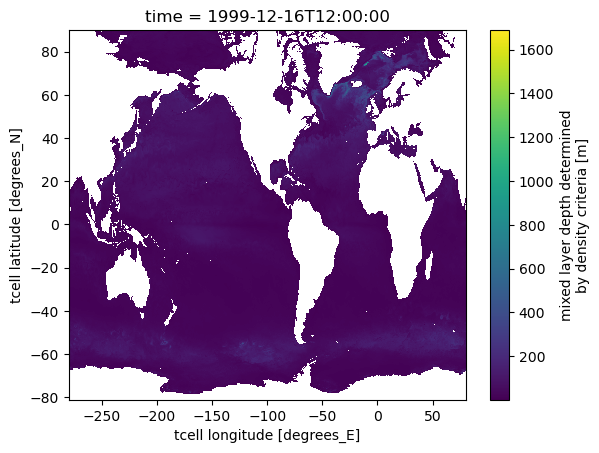

In [8]:
mld[0].plot()

In [15]:
# compute climatology:
mldm = mld.groupby('time.month').mean('time')
mldm = mldm.load()
ds = xr.Dataset({'mld':mldm})
ds.to_netcdf('mld_climatology_argo.nc')

In [16]:
# compute annual climatology:
mlda = mld.mean('time')
mlda = mlda.load()
ds = xr.Dataset({'mld':mlda})
ds.to_netcdf('mld_annual_climatology_argo.nc')

In [18]:
## WOA has 2 periods with climatology: 2015:2017 and 1981: 2010

start_time='2005-01-01'
end_time='2017-12-31'

mld = cc.querying.getvar(control,variable, master_session,start_time=start_time, end_time=end_time,frequency="1 monthly")

# compute climatology:
mldm = mld.groupby('time.month').mean('time')
mldm = mldm.load()
ds = xr.Dataset({'mld':mldm})
ds.to_netcdf('mld_climatology_woa.nc')

# compute annual climatology:
mlda = mld.mean('time')
mlda = mlda.load()
ds = xr.Dataset({'mld':mlda})
ds.to_netcdf('mld_annual_climatology_woa.nc')